In [1]:
%matplotlib inline

import os.path as path
import stripy as stripack
import numpy as np
import gdal
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
def spherical_midpoints(interpolator):

    import pyproj
    
    lst = interpolator.lst
    lend = interpolator.lend
    lptr = interpolator.lptr

    g = pyproj.Geod(ellps='WGS84')

    midlon_array = np.ones((len(lptr))) * -99999.0
    midlat_array = np.ones((len(lptr))) * -99999.0
    
    lonv1 = interpolator.lons
    latv1 = interpolator.lats


    for i in range(0,len(lptr),1):
        n1 = lst[i]-1
        n2 = lst[lptr[i]-1]-1
        if n1 < n2:
            midlonlat, = g.npts(lonv1[n1],latv1[n1],lonv1[n2],latv1[n2], 1 , radians=True )
            midlon_array[i] = midlonlat[0]
            midlat_array[i] = midlonlat[1]
            
    valid_points =  np.where(midlon_array != -99999.0 )    

    midlon_array = midlon_array[valid_points[0]]
    midlat_array = midlat_array[valid_points[0]]
    
   
    return midlon_array, midlat_array
                                      

def add_spherical_midpoints(interpolator):   
    
    midlon_array, midlat_array = spherical_midpoints(interpolator)
    
    lonv2 = np.concatenate((interpolator.lons, midlon_array), axis=0)
    latv2 = np.concatenate((interpolator.lats, midlat_array), axis=0)
    
    return np.degrees(lonv2), np.degrees(latv2)
    
    

In [3]:
octahedral_vertices = np.array([
    [  0.001,    0.0],
    [ -0.001,   90.0],
    [  0.001,  180.0],
    [ -0.001,  -90.0],
    [ 90.0,      0.0],
    [-90.0,    180.0]]
)


icosohedral_vertices = np.array([
    [ 89.99,      0.1 ],
    [-89.99,      0.2 ],
    [ 26.57,      0.0 ], 
    [-26.57,     36.0 ], 
    [ 26.57,     72.0 ],
    [-26.57,    108.0 ],        
    [ 26.57,    144.0 ],
    [-26.57,    180.0 ],        
    [ 26.57,    -72.0 ],
    [-26.57,    -36.0 ],
    [ 26.57,   -144.0 ],
    [-26.57,   -108.0 ]]        
)


vertices_lat = octahedral_vertices.T[0]
vertices_lon = octahedral_vertices.T[1]

# vertices_lat = icosohedral_vertices.T[0]
# vertices_lon = icosohedral_vertices.T[1]


In [4]:
interpolator = stripack.trmesh(np.radians(vertices_lon),
                               np.radians(vertices_lat) )

In [5]:
lonv1, latv1 = add_spherical_midpoints(interpolator)
interpolator1 = stripack.trmesh(np.radians(lonv1), np.radians(latv1) )

lonv1, latv1 = add_spherical_midpoints(interpolator1)
interpolator2 = stripack.trmesh(np.radians(lonv1), np.radians(latv1) )

lonv1, latv1 = add_spherical_midpoints(interpolator2)
interpolator3 = stripack.trmesh(np.radians(lonv1), np.radians(latv1) )

lonv1, latv1 = add_spherical_midpoints(interpolator3)
interpolator4 = stripack.trmesh(np.radians(lonv1), np.radians(latv1) )

lonv1, latv1 = add_spherical_midpoints(interpolator4)
interpolator5 = stripack.trmesh(np.radians(lonv1), np.radians(latv1) )

lonv1, latv1 = add_spherical_midpoints(interpolator5)
interpolator6 = stripack.trmesh(np.radians(lonv1), np.radians(latv1) )

lonv1, latv1 = add_spherical_midpoints(interpolator6)
interpolator7 = stripack.trmesh(np.radians(lonv1), np.radians(latv1) )



In [6]:
interpolator7.npts

65538

In [7]:
%%timeit

interpolator7 = stripack.trmesh(np.radians(lonv1), np.radians(latv1) )

10 loops, best of 3: 73.2 ms per loop


In [8]:


global_extent     = [-180.0, 180.0, -90.0, 90.0]

projection1 = ccrs.Orthographic(central_longitude=0.0, central_latitude=1, globe=None)
projection2 = ccrs.Mollweide(central_longitude=-120)
projection3 = ccrs.PlateCarree()
base_projection = ccrs.PlateCarree()

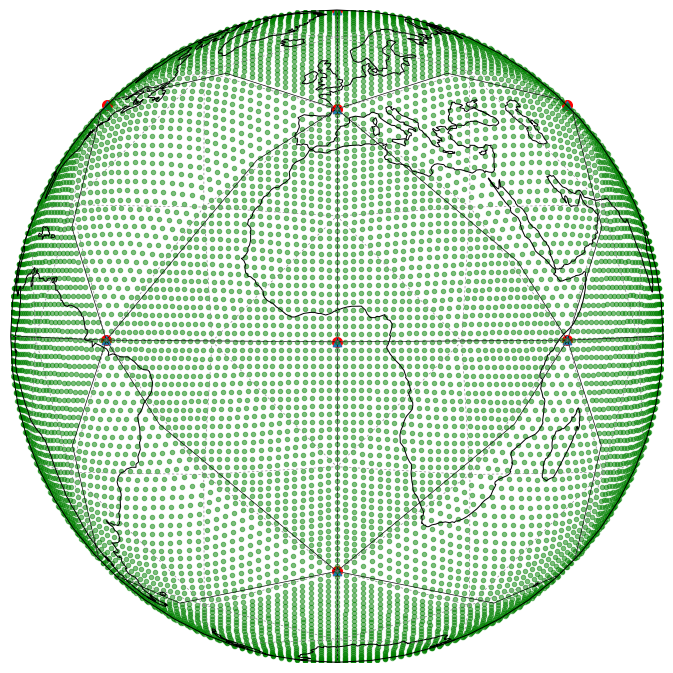

In [9]:

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=projection1)
ax.coastlines()
ax.set_global()

plot_interpolator = interpolator1


lons = np.degrees(plot_interpolator.lons)
lats = np.degrees(plot_interpolator.lats)

ax.scatter(lons, lats, color="Red",
            marker="o", s=100.0, transform=ccrs.Geodetic())

plot_interpolator = interpolator1

lons = np.degrees(plot_interpolator.lons)
lats = np.degrees(plot_interpolator.lats)

ax.scatter(lons, lats, 
            marker="^", s=75.0, transform=ccrs.Geodetic())



plot_interpolator = interpolator6

lons = np.degrees(plot_interpolator.lons)
lats = np.degrees(plot_interpolator.lats)

ax.scatter(lons, lats, color="Green",
            marker="o", s=20.0, alpha=0.5, transform=ccrs.Geodetic())




# plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)

plot_interpolator = interpolator1

lst  = plot_interpolator.lst
lptr = plot_interpolator.lptr

lons = np.degrees(plot_interpolator.lons)
lats = np.degrees(plot_interpolator.lats)

for i in range(0,len(lst),1):
    n1 = lst[i]-1
    n2 = lst[lptr[i]-1]-1
    if n1 < n2:
        ax.plot( [lons[n1], lons[n2]],
                 [lats[n1], lats[n2]], 
                  linewidth=0.66, 
                  color="black", transform=ccrs.Geodetic())
        

plot_interpolator = interpolator2

lst  = plot_interpolator.lst
lptr = plot_interpolator.lptr

lons = np.degrees(plot_interpolator.lons)
lats = np.degrees(plot_interpolator.lats)

for i in range(0,len(lst),1):
    n1 = lst[i]-1
    n2 = lst[lptr[i]-1]-1
    if n1 < n2:
        ax.plot( [lons[n1], lons[n2]],
                 [lats[n1], lats[n2]], 
                  linewidth=0.66, linestyle=':',
                  color="gray", transform=ccrs.Geodetic())
        

In [10]:
data = np.array( range(0,interpolator.npts), dtype=float)

interpolator.interp(np.radians([90.0,0.0]), np.radians([75.00,0.0]), data)

array([  3.36602774e+00,   8.72649395e-05])

In [11]:
bcc, nodes = interpolator.find_point(np.radians([90.0,]), np.radians([75.00,]))

print (data[nodes-1] * bcc).sum()

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [ ]:
print np.degrees(interpolator.lats)
print np.degrees(interpolator.lons)